In [52]:
from google.colab import drive
drive.mount('/content/drive')

import csv
import math
import queue
import networkx as nx
import matplotlib.pyplot as plt

def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def astar(graph, start, goal, heuristic):
    visited = set()
    total_distance = 0
    pri_queue = queue.PriorityQueue()  # Priority queue
    pri_queue.put((0 + heuristic[start], [start]))  # Initial state: f = g + h = 0 + heuristic

    while not pri_queue.empty():
        f, current_path = pri_queue.get()
        current_node = current_path[-1]

        if current_node == goal:
            return current_path, total_distance # Goal found

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_path = current_path + [neighbor]  # Include neighbor in the current path
                g = 0  # Reset g here before calculating its value
                for i in range(len(new_path) - 1):
                    g += int(graph[new_path[i]][new_path[i + 1]]['weight'])  # Recalculate g for the new path
                pri_queue.put((g + heuristic[neighbor], new_path))
                total_distance = g
    return []  # Goal not found


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Path from Kochi to Kolkata found: Kochi -> Chennai -> Kolkata
Total Distance = 3005


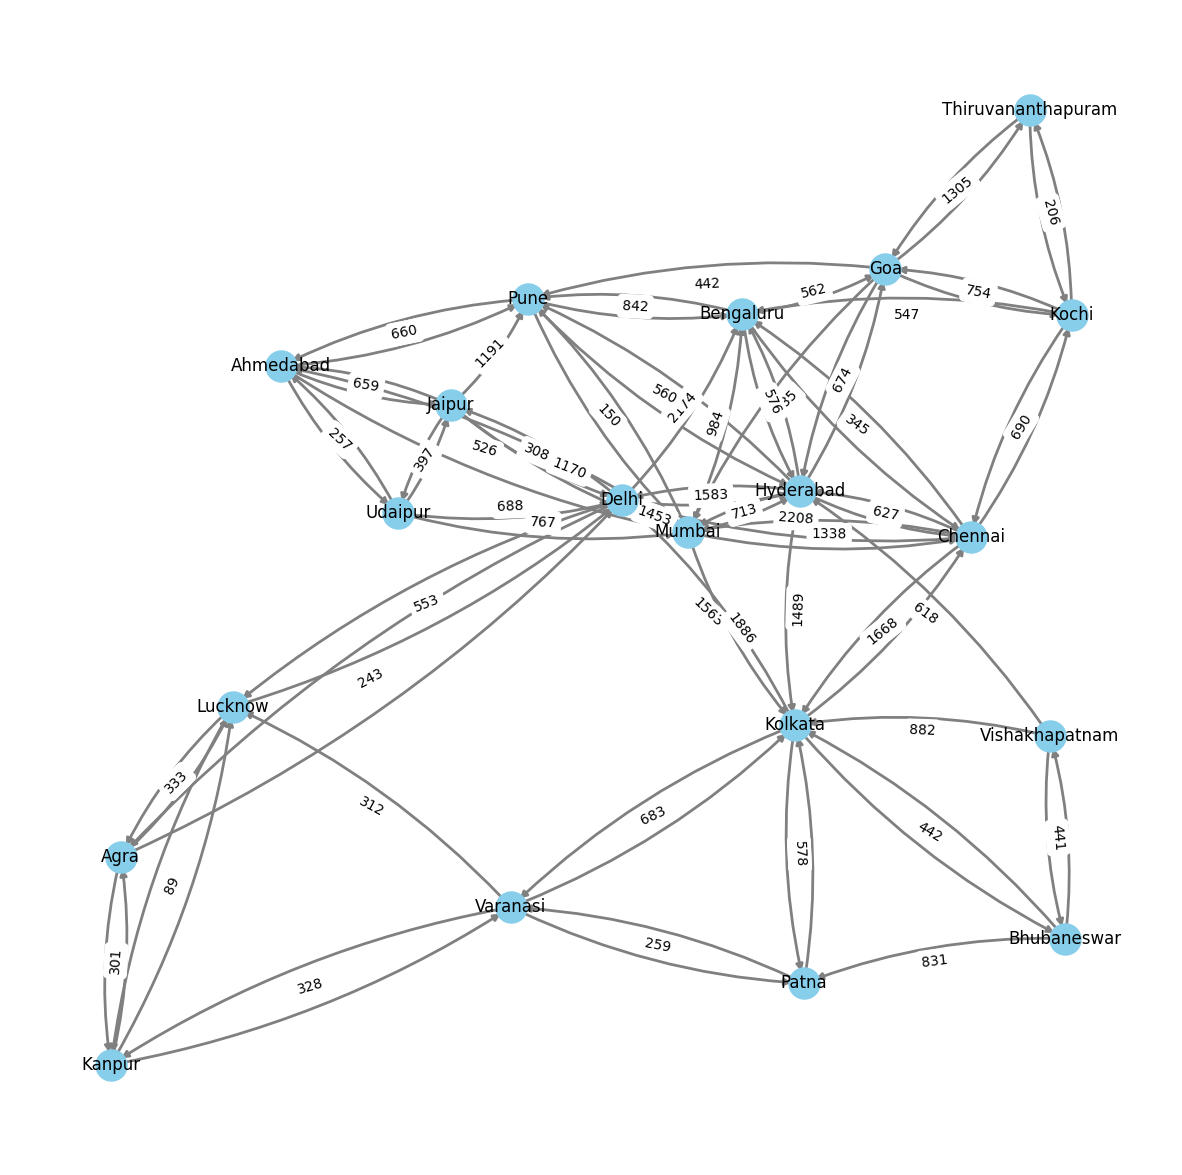

In [53]:
file_path = "/content/drive/MyDrive/indian-cities-dataset.csv"
temp_list=[]
with open(file_path, 'r') as file:
  csvreader = csv.reader(file)
  next(csvreader)
  for row in csvreader:
    temp_list.append(row)

G = nx.DiGraph()
G.add_weighted_edges_from(temp_list)

start_node = 'Kochi'
goal_node = 'Kolkata'

pos = nx.spring_layout(G)

# Heuristic function using Euclidean distance
heuristic = {node: euclidean_distance(node, goal_node, pos) for node in G.nodes}

path, total_distance = astar(G, start_node, goal_node, heuristic)

if path:
    print("Path from {} to {} found: {}".format(start_node, goal_node, ' -> '.join(path)))
    print('Total Distance = '+ str(total_distance))
else:
    print("No path found from {} to {}".format(start_node, goal_node))

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
nx.draw_networkx_edges(G, pos, edge_color='gray', width=2, arrows=True, connectionstyle='arc3, rad=0.1')

# Add labels for edges
labels = {(u, v): w for u, v, w in temp_list}

nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)

# Add labels for nodes
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Set the figure size (width: 10 inches, height: 5 inches)
plt.gcf().set_size_inches(15, 15)

# Show the plot
plt.axis('off')  # Hide axes
plt.show()
